In [56]:
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# 計算歐式距離 Euclidean Distance
# https://hackmd.io/@nbswords/SkiiLN_3u
def Euclidean_distance(test_data, train_data):
    total = 0
    for i, _ in enumerate(test_data):
        total += ((train_data[i] - test_data[i]) ** 2)
    return math.sqrt(total)
    

In [58]:
# 計算準確率
# Accuracy, Precision, Recall, F1score
# https://medium.com/@imirene/python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%88%86%E9%A1%9E%E6%A8%A1%E5%9E%8B%E7%9A%845%E5%80%8B%E8%A9%95%E4%BC%B0%E6%8C%87%E6%A8%99-3260f116ce47

def Accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn) 


def Precision(tp, fp):
    if (tp + fp) == 0:
        return 0
    return tp / (tp + fp)


def Recall(tp, fn):
    if (tp + fn) == 0:
        return 0
    return tp / (tp + fn)


def F1score(tp, fp, fn):
    precision = Precision(tp, fp)
    recall = Recall(tp, fn)
    if (precision + recall) == 0:
        return 0
    return (2 * precision * recall) / (precision + recall)


# 求出 tp, tn, fp, fn
def get_tp_tn_fp_fn(save_output, df_test_ans):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    # 計算 tp, tn, fp, fn
    for i, _ in enumerate(save_output):
        if df_test_ans[i] and save_output[i]:
            tp += 1
        elif not df_test_ans[i] and not save_output[i]:
            tn += 1
        elif df_test_ans[i] and not save_output[i]:
            fn += 1
        else:
            fp += 1
    return tp, tn, fp, fn


def get_result(save_output, df_test_ans):
    tp, tn, fp, fn = get_tp_tn_fp_fn(save_output, df_test_ans)
    return Accuracy(tp, tn, fp, fn), Precision(tp, fp), Recall(tp, fn), F1score(tp, fp, fn)
    

In [59]:
def draw_all_accuracy(acc_list, precision_list, recall_list, flscore_list):

    # 找最大值以及 k 的 index
    # 因為 k 值只有奇數，所以才要乘2
    best_acc_value = max(acc_list)
    best_acc_k = acc_list.index(best_acc_value) * 2 + 1
    best_precision_value = max(precision_list)
    best_precision_k = precision_list.index(best_precision_value) * 2 + 1
    best_recall_value = max(recall_list)
    best_recall_k = recall_list.index(best_recall_value) * 2 + 1
    best_flscore_value = max(flscore_list)
    best_flscore_k = flscore_list.index(best_flscore_value) * 2 + 1

    # x軸的值
    x_value = [i * 2 + 1 for i in range(len(acc_list))]

    print(f"Accuracy: best k = {best_acc_k}, highest value = {best_acc_value}")
    print(f"Precision: best k = {best_precision_k}, highest value = {best_precision_value}")
    print(f"Recall: best k = {best_recall_k}, highest value = {best_recall_value}")
    print(f"F1-score: best k = {best_flscore_k}, highest value = {best_flscore_value}")
    
    plt.figure(figsize=(12, 4))
    plt.plot(x_value, acc_list, c='r')
    plt.plot(x_value, precision_list) 
    plt.plot(x_value, recall_list, c='g')
    plt.plot(x_value, flscore_list, c='m')
    plt.legend(['Accuracy', 'Precision', 'Recall', 'F1-score'])
    plt.title('Evaluation')
    plt.show()


# 畫 Confusion Matrix   
def draw_ConfusionMatrix(save_output, df_test_ans):
    tp, tn, fp, fn = get_tp_tn_fp_fn(save_output, df_test_ans)

    confusion_matrix = [[tn, fp], [fn, tp]]
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Pred")
    plt.ylabel("True")
    plt.show()


In [60]:
# 正規化資料
# 將資料範圍限縮在 0~1
def data_normalization(df_train, df_test):
    for i in df_train:
        df_train[i] = (df_train[i] - df_train[i].min()) / (df_train[i].max() - df_train[i].min())

    for i in df_test:
        df_test[i] = (df_test[i] - df_test[i].min()) / (df_test[i].max() - df_test[i].min())

    return df_train, df_test


In [61]:
def data_preprocessing(df_train, df_test):
    # Glucose, BloodPressure, SkinThickness, Insulin, BMI 理論上不可為0
    # 用平均數補0的值

    # 取非0設值的平均
    Glucose_mean = df_train[df_train["Glucose"] != 0]["Glucose"].mean()
    BloodPressure_mean = df_train[df_train["BloodPressure"] != 0]["BloodPressure"].mean()
    SkinThickness_mean = df_train[df_train["SkinThickness"] != 0]["SkinThickness"].mean()
    Insulin_mean = df_train[df_train["Insulin"] != 0]["Insulin"].mean()
    BMI_mean = df_train[df_train["BMI"] != 0]["BMI"].mean()

    # 將 train 以及 test data 的值換成平均值
    df_train.loc[df_train["Glucose"] == 0, "Glucose"] = Glucose_mean
    df_train.loc[df_train["BloodPressure"] == 0, "BloodPressure"] = BloodPressure_mean
    df_train.loc[df_train["SkinThickness"] == 0, "SkinThickness"] = SkinThickness_mean
    df_train.loc[df_train["Insulin"] == 0, "Insulin"] = Insulin_mean
    df_train.loc[df_train["BMI"] == 0, "BMI"] = BMI_mean

    df_test.loc[df_test["Glucose"] == 0, "Glucose"] = Glucose_mean
    df_test.loc[df_test["BloodPressure"] == 0, "BloodPressure"] = BloodPressure_mean
    df_test.loc[df_test["SkinThickness"] == 0, "SkinThickness"] = SkinThickness_mean
    df_test.loc[df_test["Insulin"] == 0, "Insulin"] = Insulin_mean
    df_test.loc[df_test["BMI"] == 0, "BMI"] = BMI_mean

    # 資料正規化
    df_train, df_test = data_normalization(df_train, df_test)

    return df_train, df_test


In [62]:
# 1. 算一個 test_data 與所有 train_data 的距離，將距離存到 list 中
# 2. sort list
# 3. find k nearest
def run_knn(df_train, df_test, k):
    # 將test的答案拆開，以及轉成 list 方便後續操作
    df_test_list = df_test.drop(columns=['Outcome']).values.tolist()
    # 將 train data 的 outcome 與其他資訊分開，方便計算歐式距離
    train_outcome = df_train["Outcome"].values.tolist()
    df_train_list = df_train.drop(columns=['Outcome']).values.tolist()

    # 存所有 test 的答案
    save_output = []
    for test_data in df_test_list:
        # 存單一 test data 到所有 train data 的距離
        dis_list = []
        # 計算一筆 test_data 到所有 train_data 之間的距離
        for i, train_data in enumerate(df_train_list):
            # train data 的答案
            outcome = train_outcome[i]
            # 計算 test 到一個 train data 之間的歐式距離
            dis = Euclidean_distance(test_data, train_data)
            # 將距離和答案加到 list 中
            dis_list.append([dis, outcome])
        
        # sort list
        dis_list.sort()
        # 取前 k 小的 distance 加進 list
        Outcome_list = [int(i[1]) for i in dis_list[:k]]

        # 判斷 1 比較多還是 0
        # K / threshold 個 data 為1, 答案就會是1
        # threshold 越高, 理論上越容易被判斷為1 
        threshold = 3
        # 因為結果只有1或0, 所以直接加總就可以知道有幾個1
        save_output.append(1 if sum(Outcome_list) > (k // threshold) else 0)
        
    return save_output


In [63]:
# 找出最好的 K 值
def find_best_k_value(train_path, test_path):
    # 讀取資料
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    # 資料前處理
    df_train, df_test = data_preprocessing(df_train, df_test)

    # test data 的答案
    df_test_ans = df_test["Outcome"].astype(int).values.tolist()

    # 存不同的準確率, 方便最後計算
    acc_list = []
    precision_list = []
    recall_list = []
    flscore_list = []

    # 跑過所有 k 值, 每次 k + 2 (因為偶數不好)
    # 找出最好的 k 值
    for k in range(1, 101, 2):
        # 開始跑 knn
        save_output = run_knn(df_train, df_test, k)
        # 算各種準確率
        accuracy, precision, recall, flscore = get_result(save_output, df_test_ans)
        # 加到各自的 list 中
        acc_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        flscore_list.append(flscore)
    
    # 畫各種圖
    draw_all_accuracy(acc_list, precision_list, recall_list, flscore_list)

In [64]:
# 如果想直接跑 knn, call 這 function
def direct_run_knn(train_path, test_path, k): 
    # 讀取資料
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)

    # 資料前處理
    df_train, df_test = data_preprocessing(df_train, df_test)
    
    # test data 的答案
    df_test_ans = df_test["Outcome"].astype(int).values.tolist()
    
    # 跑 knn
    save_output = run_knn(df_train, df_test, k)
    # 將 knn 結果丟去算準確率
    accuracy, precision, recall, flscore = get_result(save_output, df_test_ans)
    print("Accuracy  = ", accuracy)
    print("Precision = ", precision)
    print("Recall    = ", recall)
    print("F1 score  = ", flscore)
    draw_ConfusionMatrix(save_output, df_test_ans)
    

### 從這裡開始
主要有兩個功能
> find_best_k_value：<br>
這裡主要是要找出最好的k值 他會將所有可能的k值跑一遍<br>
跑完後會呈現4個不同準確率的K值折線圖 


> direct_run_knn：<br>
這裡只要輸入資料路徑以及k值，就可以直接跑knn <br>
跑完之後會出現4個不同的準確率以及 Confusion Matrix


記得先執行上面的 function 再跑下面的 


## find_best_k_value

### 實驗A, Threshold = 3 

>k = 9 的時候可以得到最高的Accuracy 以及 Precision</br>
Accuracy  =  0.8109452736318408 </br>
Precision =  0.6987951807228916</br>
Recall    =  0.8169014084507042</br>
F1 score  =  0.7532467532467533</br>

>k = 23 的時候可以得到最高的 Recall 值</br>
Accuracy  =  0.7711442786069652</br>
Precision =  0.6190476190476191</br>
Recall    =  0.9154929577464789</br>
F1 score  =  0.7386363636363635



Accuracy: best k = 9, highest value = 0.8109452736318408
Precision: best k = 9, highest value = 0.6987951807228916
Recall: best k = 23, highest value = 0.9154929577464789
F1-score: best k = 33, highest value = 0.757396449704142


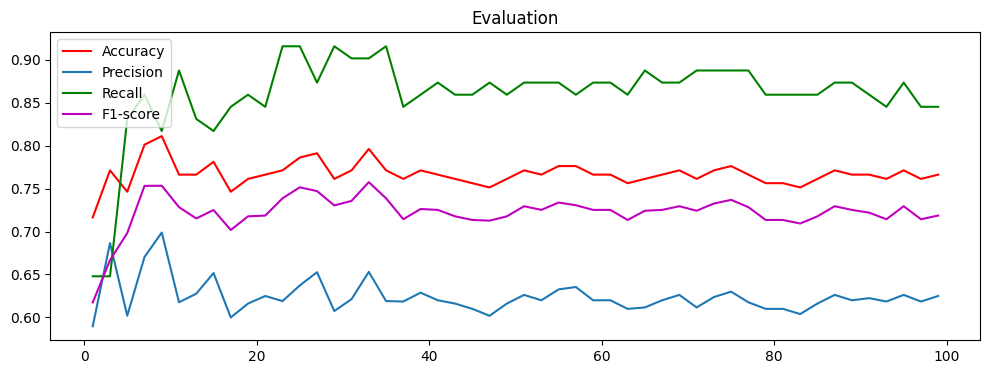

In [68]:
# 想找出最好的 k 值按這
# 跑實驗A的資料
# threshold = 3
train_path = "實驗A/train_data.csv"
test_path =  "實驗A/test_data.csv"
find_best_k_value(train_path, test_path)

### 實驗A, Threshold = 2

>k = 25 的時候可以得到最高的Accuracy</br>
Accuracy  =  0.8308457711442786</br>
Precision =  0.8135593220338984</br>
Recall    =  0.676056338028169</br>
F1 score  =  0.7384615384615385</br>

>k = 17 的時候可以得到最高的Precision</br>
Accuracy  =  0.8208955223880597</br>
Precision =  0.8301886792452831</br>
Recall    =  0.6197183098591549</br>
F1 score  =  0.7096774193548387</br>

>k = 5 的時候可以得到最高的 Recall 值</br>
Accuracy  =  0.8208955223880597</br>
Precision =  0.7692307692307693</br>
Recall    =  0.704225352112676</br>
F1 score  =  0.7352941176470589</br>





Accuracy: best k = 25, highest value = 0.8308457711442786
Precision: best k = 17, highest value = 0.8301886792452831
Recall: best k = 5, highest value = 0.704225352112676
F1-score: best k = 25, highest value = 0.7384615384615385


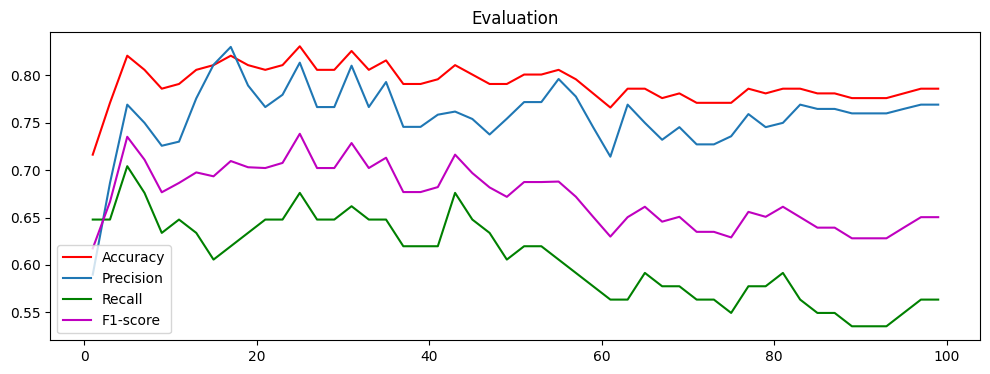

In [81]:
# 想找出最好的 k 值按這
# 跑實驗A的資料
# threshold = 2
train_path = "實驗A/train_data.csv"
test_path =  "實驗A/test_data.csv"
find_best_k_value(train_path, test_path)

### 實驗B, Threshold = 3

>k = 9 的時候可以得到最高的Accuracy</br>
Accuracy  =  0.8</br>
Precision =  0.6976744186046512</br>
Recall    =  0.8108108108108109</br>
F1 score  =  0.75</br>

>k = 3 的時候可以得到最高的Precision</br>
Accuracy  =  0.74</br>
Precision =  0.72</br>
Recall    =  0.4864864864864865</br>
F1 score  =  0.5806451612903226</br>
(Recall值太低了)

>k = 35 的時候可以得到最高的 Recall 值</br>
Accuracy  =  0.78</br>
Precision =  0.6470588235294118</br>
Recall    =  0.8918918918918919</br>
F1 score  =  0.7499999999999999</br>


Accuracy: best k = 9, highest value = 0.8
Precision: best k = 3, highest value = 0.72
Recall: best k = 35, highest value = 0.8918918918918919
F1-score: best k = 53, highest value = 0.7674418604651163


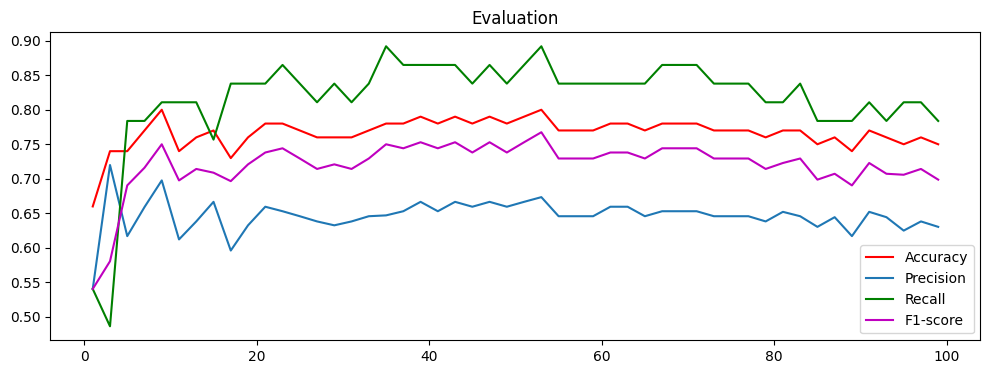

In [69]:
# 想找出最好的 k 值按這
# 跑實驗B的資料
# threshold = 3
train_path = "實驗B/train_data.csv"
test_path =  "實驗B/test_data.csv"
find_best_k_value(train_path, test_path)

### 實驗B, Threshold = 2

>k = 61 的時候可以得到最高的 Accuracy 以及 Precision</br>
Accuracy  =  0.79</br>
Precision =  0.9</br>
Recall    =  0.4864864864864865</br>
F1 score  =  0.631578947368421</br>

>k = 13 的時候可以得到最高的 Recall 值</br>
Accuracy  =  0.78</br>
Precision =  0.7272727272727273</br>
Recall    =  0.6486486486486487</br>
F1 score  =  0.6857142857142857</br>

Accuracy: best k = 15, highest value = 0.79
Precision: best k = 61, highest value = 0.9
Recall: best k = 13, highest value = 0.6486486486486487
F1-score: best k = 15, highest value = 0.6956521739130435


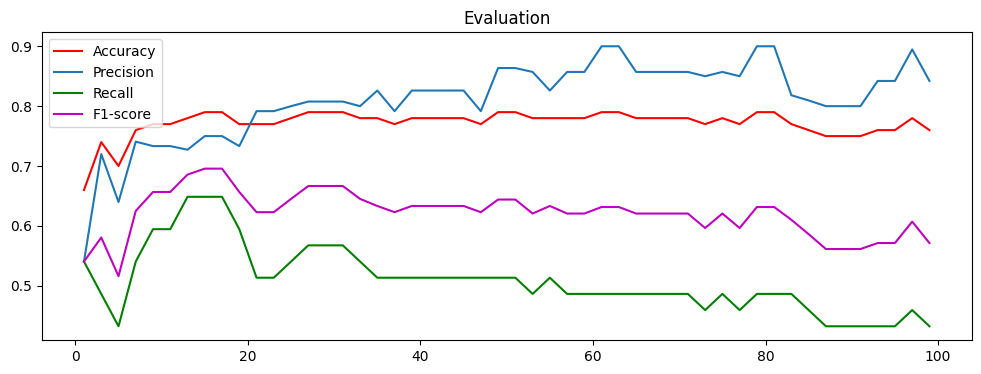

In [82]:
# 想找出最好的 k 值按這
# 跑實驗B的資料
# threshold = 2
train_path = "實驗B/train_data.csv"
test_path =  "實驗B/test_data.csv"
find_best_k_value(train_path, test_path)

### 實驗A

k =  9
Accuracy  =  0.8109452736318408
Precision =  0.6987951807228916
Recall    =  0.8169014084507042
F1 score  =  0.7532467532467533


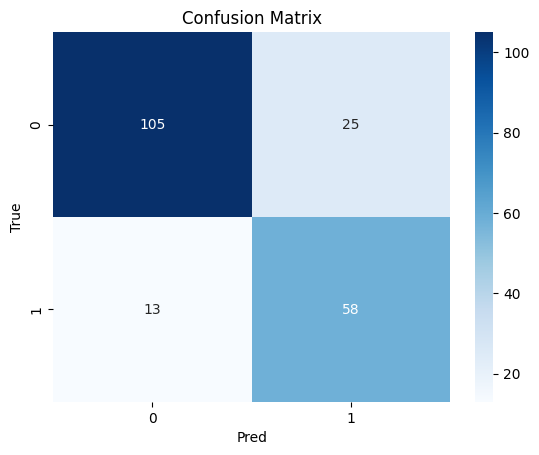

In [65]:
# 想直接跑 knn 的時候可以按這
# 實驗A, Threshold = 3
train_path = "實驗A/train_data.csv"
test_path =  "實驗A/test_data.csv"
k = 9
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  23
Accuracy  =  0.7711442786069652
Precision =  0.6190476190476191
Recall    =  0.9154929577464789
F1 score  =  0.7386363636363635


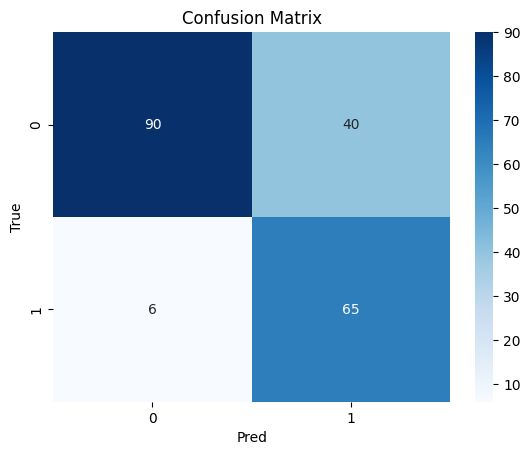

In [66]:
# 想直接跑 knn 的時候可以按這
# 實驗A, Threshold = 3
train_path = "實驗A/train_data.csv"
test_path =  "實驗A/test_data.csv"
k = 23
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  25
Accuracy  =  0.8308457711442786
Precision =  0.8135593220338984
Recall    =  0.676056338028169
F1 score  =  0.7384615384615385


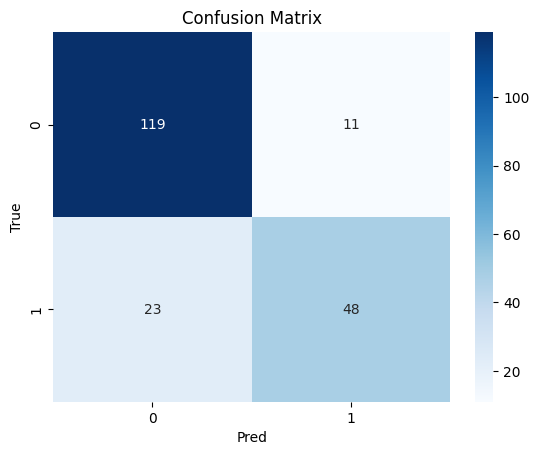

In [46]:
# 想直接跑 knn 的時候可以按這
# 實驗A, Threshold = 2
train_path = "實驗A/train_data.csv"
test_path =  "實驗A/test_data.csv"
k = 25
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  17
Accuracy  =  0.8208955223880597
Precision =  0.8301886792452831
Recall    =  0.6197183098591549
F1 score  =  0.7096774193548387


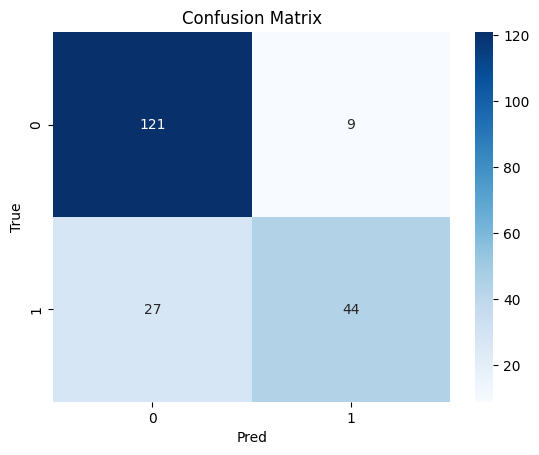

In [47]:
# 想直接跑 knn 的時候可以按這
# 實驗A, Threshold = 2
train_path = "實驗A/train_data.csv"
test_path =  "實驗A/test_data.csv"
k = 17
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  5
Accuracy  =  0.8208955223880597
Precision =  0.7692307692307693
Recall    =  0.704225352112676
F1 score  =  0.7352941176470589


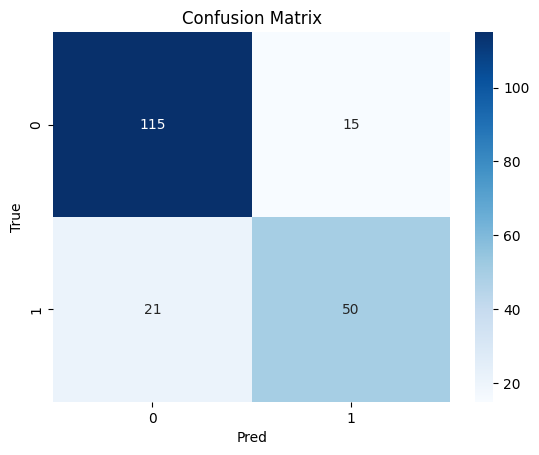

In [48]:
# 想直接跑 knn 的時候可以按這
# 實驗A, Threshold = 2
train_path = "實驗A/train_data.csv"
test_path =  "實驗A/test_data.csv"
k = 5
print("k = ", k)
direct_run_knn(train_path, test_path, k)

### 實驗B

k =  9
Accuracy  =  0.8
Precision =  0.6976744186046512
Recall    =  0.8108108108108109
F1 score  =  0.75


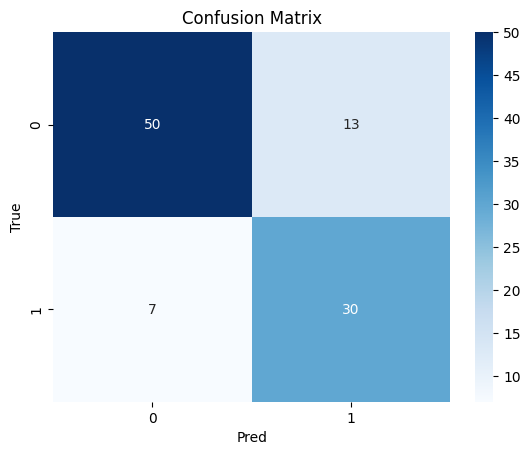

In [67]:
# 想直接跑 knn 的時候可以按這
# 實驗B, Threshold = 3
train_path = "實驗B/train_data.csv"
test_path =  "實驗B/test_data.csv"
k = 9
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  3
Accuracy  =  0.74
Precision =  0.72
Recall    =  0.4864864864864865
F1 score  =  0.5806451612903226


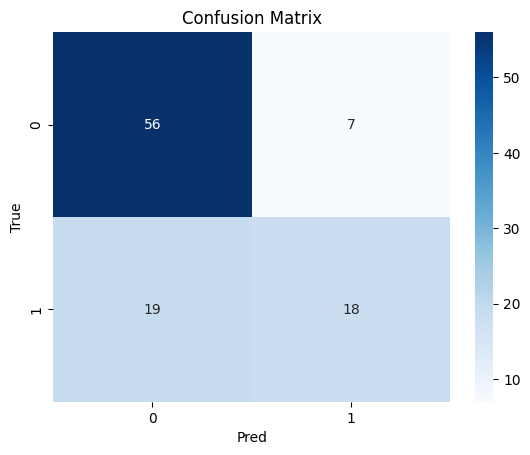

In [68]:
# 想直接跑 knn 的時候可以按這
# 實驗B, Threshold = 3
train_path = "實驗B/train_data.csv"
test_path =  "實驗B/test_data.csv"
k = 3
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  35
Accuracy  =  0.78
Precision =  0.6470588235294118
Recall    =  0.8918918918918919
F1 score  =  0.7499999999999999


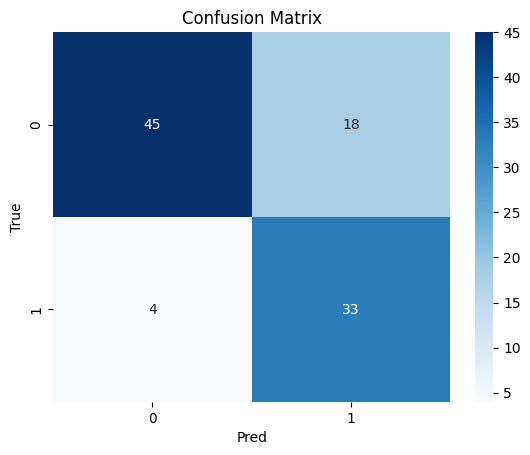

In [69]:
# 想直接跑 knn 的時候可以按這
# 實驗B, Threshold = 3
train_path = "實驗B/train_data.csv"
test_path =  "實驗B/test_data.csv"
k = 35
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  15
Accuracy  =  0.79
Precision =  0.75
Recall    =  0.6486486486486487
F1 score  =  0.6956521739130435


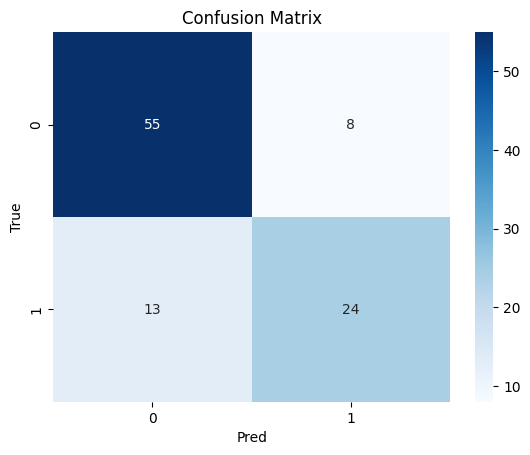

In [52]:
# 想直接跑 knn 的時候可以按這
# 實驗B, Threshold = 2
train_path = "實驗B/train_data.csv"
test_path =  "實驗B/test_data.csv"
k = 15
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  61
Accuracy  =  0.79
Precision =  0.9
Recall    =  0.4864864864864865
F1 score  =  0.631578947368421


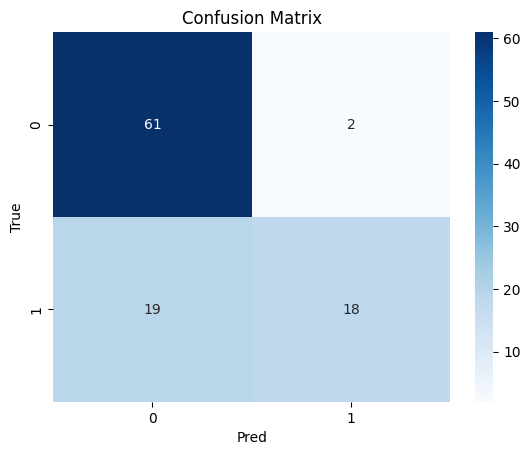

In [53]:
# 想直接跑 knn 的時候可以按這
# 實驗B, Threshold = 2
train_path = "實驗B/train_data.csv"
test_path =  "實驗B/test_data.csv"
k = 61
print("k = ", k)
direct_run_knn(train_path, test_path, k)

k =  13
Accuracy  =  0.78
Precision =  0.7272727272727273
Recall    =  0.6486486486486487
F1 score  =  0.6857142857142857


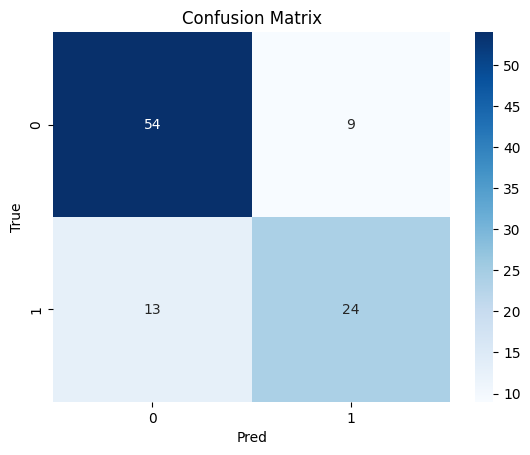

In [54]:
# 想直接跑 knn 的時候可以按這
# 實驗B, Threshold = 2
train_path = "實驗B/train_data.csv"
test_path =  "實驗B/test_data.csv"
k = 13
print("k = ", k)
direct_run_knn(train_path, test_path, k)